## Data Preprocessing for Machine Learning

In [355]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [356]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Le tableau ci-dessus montre les cinq premières ligne de l'ensemble de données IRIS.

In [357]:
df.shape

(150, 5)

L'ensemble de données contient 150 enegistements (lignes) et 5 colonnes.

In [358]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Il n'existe aucune valeur manquante dans l'ensemble de données.

In [359]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Ici nous avons une description statistique des différentes variables.

## Interprétation des quartiles et de la distribution

### Sepal Length (Longueur du sépale)
- **Premier quartile (Q1)**: 5.1 cm - 25% des iris ont des sépales de longueur inférieure à 5.1 cm
- **Médiane (Q2)**: 5.8 cm - 50% des iris ont des sépales plus courts que 5.8 cm
- **Troisième quartile (Q3)**: 6.4 cm - 75% des iris ont des sépales plus courts que 6.4 cm
- **Écart interquartile (IQR)**: 1.3 cm (6.4 - 5.1)
- **Étendue**: 3.6 cm (7.9 - 4.3)
- **Distribution**: Relativement symétrique (médiane proche de la moyenne de 5.84 cm)

### Sepal Width (Largeur du sépale)
- **Q1**: 2.8 cm - 25% des iris ont des sépales moins larges que 2.8 cm
- **Q2**: 3.0 cm - La moitié des iris ont des sépales de largeur inférieure à 3.0 cm
- **Q3**: 3.3 cm - 75% des iris ont des sépales moins larges que 3.3 cm
- **IQR**: 0.5 cm (3.3 - 2.8)
- **Étendue**: 2.4 cm (4.4 - 2.0)
- **Distribution**: Assez symétrique (médiane très proche de la moyenne de 3.05 cm)

### Petal Length (Longueur du pétale)
- **Q1**: 1.6 cm - 25% des iris ont des pétales plus courts que 1.6 cm
- **Q2**: 4.35 cm - La moitié des iris ont des pétales plus courts que 4.35 cm
- **Q3**: 5.1 cm - 75% des iris ont des pétales plus courts que 5.1 cm
- **IQR**: 3.5 cm (5.1 - 1.6)
- **Étendue**: 5.9 cm (6.9 - 1.0)
- **Distribution**: Fortement asymétrique (médiane éloignée de la moyenne de 3.76 cm), suggérant une distribution bimodale ou multimodale, typique de ce jeu de données qui contient trois espèces différentes

### Petal Width (Largeur du pétale)
- **Q1**: 0.3 cm - 25% des iris ont des pétales moins larges que 0.3 cm
- **Q2**: 1.3 cm - La moitié des iris ont des pétales moins larges que 1.3 cm
- **Q3**: 1.8 cm - 75% des iris ont des pétales moins larges que 1.8 cm
- **IQR**: 1.5 cm (1.8 - 0.3)
- **Étendue**: 2.4 cm (2.5 - 0.1)
- **Distribution**: Fortement asymétrique (médiane éloignée de la moyenne de 1.20 cm), suggérant également une distribution multimodale


In [360]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Ainsi l'ensemble de données présente 3 variétées d'iris en proportion égale.

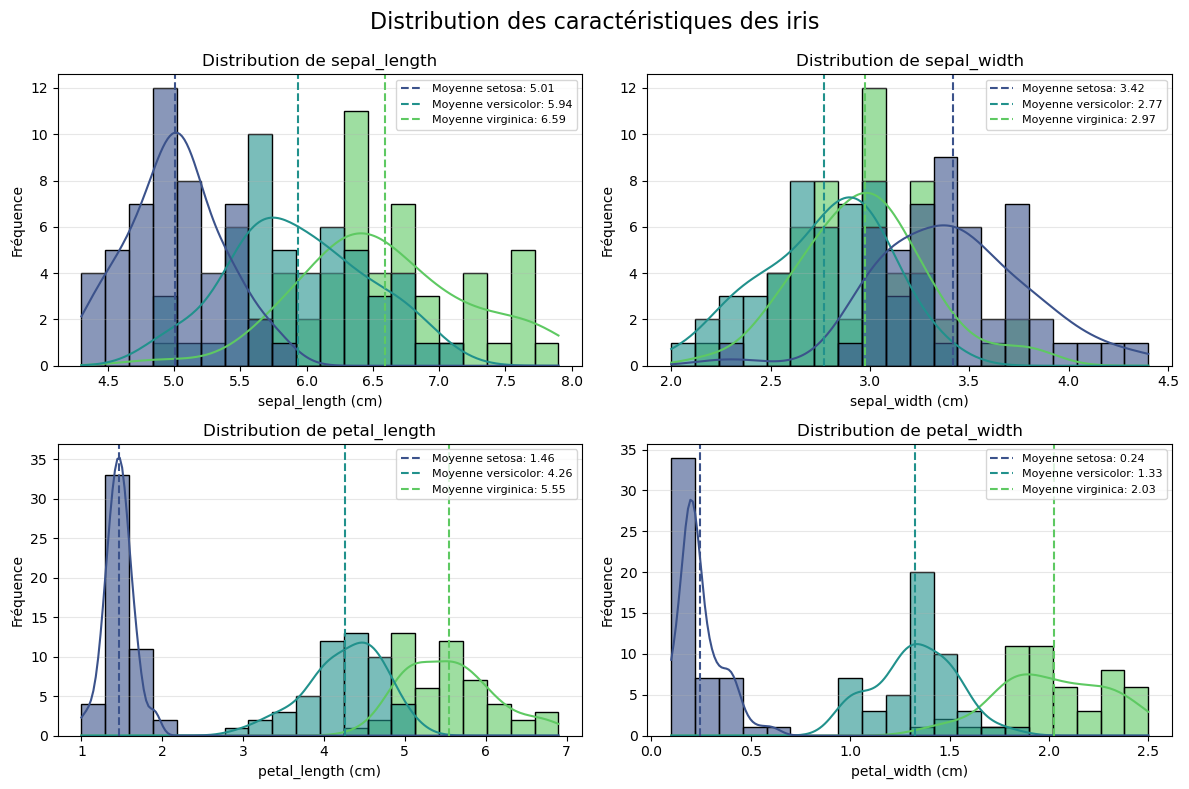

In [361]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution des caractéristiques des iris', fontsize=16, y=0.98)

variables = [
    ('sepal_length', axes[0, 0]), 
    ('sepal_width', axes[0, 1]),
    ('petal_length', axes[1, 0]), 
    ('petal_width', axes[1, 1])
]


for var, ax in variables:
    sns.histplot(data=df, x=var, kde=True, hue='species', 
                 palette='viridis', alpha=0.6, ax=ax, bins=20)
    
    for species, color in zip(df['species'].unique(), sns.color_palette('viridis', 3)):
        mean_val = df[df['species'] == species][var].mean()
        ax.axvline(mean_val, color=color, linestyle='--', linewidth=1.5, 
                   label=f'Moyenne {species}: {mean_val:.2f}')
    
    ax.set_title(f'Distribution de {var}', fontsize=12)
    ax.set_xlabel(f'{var} (cm)', fontsize=10)
    ax.set_ylabel('Fréquence', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

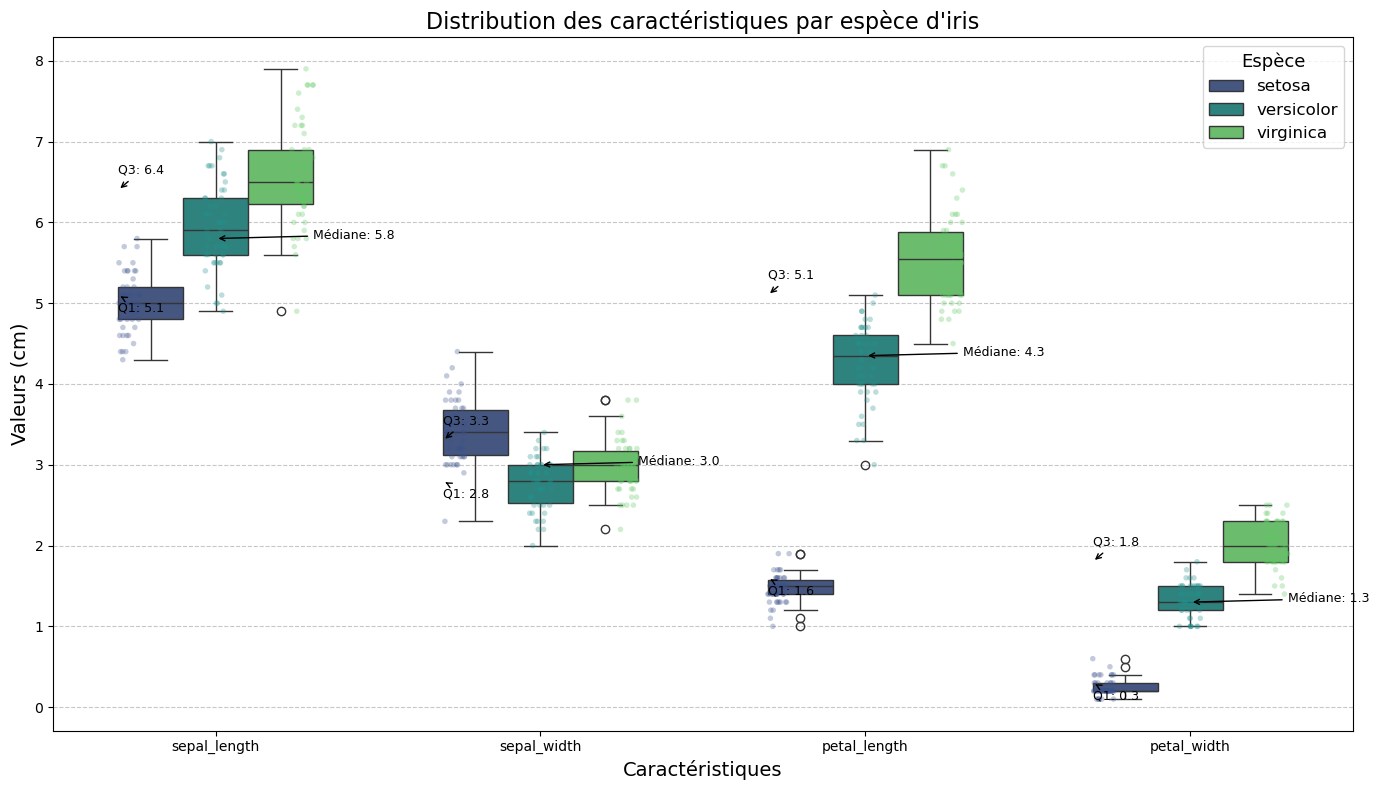

In [362]:
iris_melted = pd.melt(df, 
                      value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                      id_vars=['species'],
                      var_name='caractéristiques', 
                      value_name='valeurs')

plt.figure(figsize=(14, 8))

ax = sns.boxplot(x='caractéristiques', y='valeurs', data=iris_melted, 
                 hue='species', palette='viridis', width=0.6)

sns.stripplot(x='caractéristiques', y='valeurs', data=iris_melted,
              hue='species', palette='viridis', dodge=True, 
              alpha=0.3, size=4, jitter=True)

plt.title('Distribution des caractéristiques par espèce d\'iris', fontsize=16)
plt.xlabel('Caractéristiques', fontsize=14)
plt.ylabel('Valeurs (cm)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:3], labels[:3], title='Espèce', fontsize=12, title_fontsize=13)

for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    q1 = df[feature].quantile(0.25)
    median = df[feature].quantile(0.5)
    q3 = df[feature].quantile(0.75)
    
    plt.annotate(f'Q1: {q1:.1f}', xy=(i-0.3, q1), xytext=(i-0.3, q1-0.2),
                 arrowprops=dict(arrowstyle='->', color='black'), fontsize=9)
    plt.annotate(f'Médiane: {median:.1f}', xy=(i, median), xytext=(i+0.3, median),
                 arrowprops=dict(arrowstyle='->', color='black'), fontsize=9)
    plt.annotate(f'Q3: {q3:.1f}', xy=(i-0.3, q3), xytext=(i-0.3, q3+0.2),
                 arrowprops=dict(arrowstyle='->', color='black'), fontsize=9)

plt.tight_layout()
plt.show()

In [363]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

df_numeric = df[numeric_features]
df_categorical = df[categorical_features]

In [364]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df_categorical)

species_categories = encoder.categories_[0][1:]
encoded_feature_names = [f"species_{cat}" for cat in species_categories]

df_encoded = pd.DataFrame(
    encoded_data, 
    columns=encoded_feature_names,
    index=df_categorical.index
)

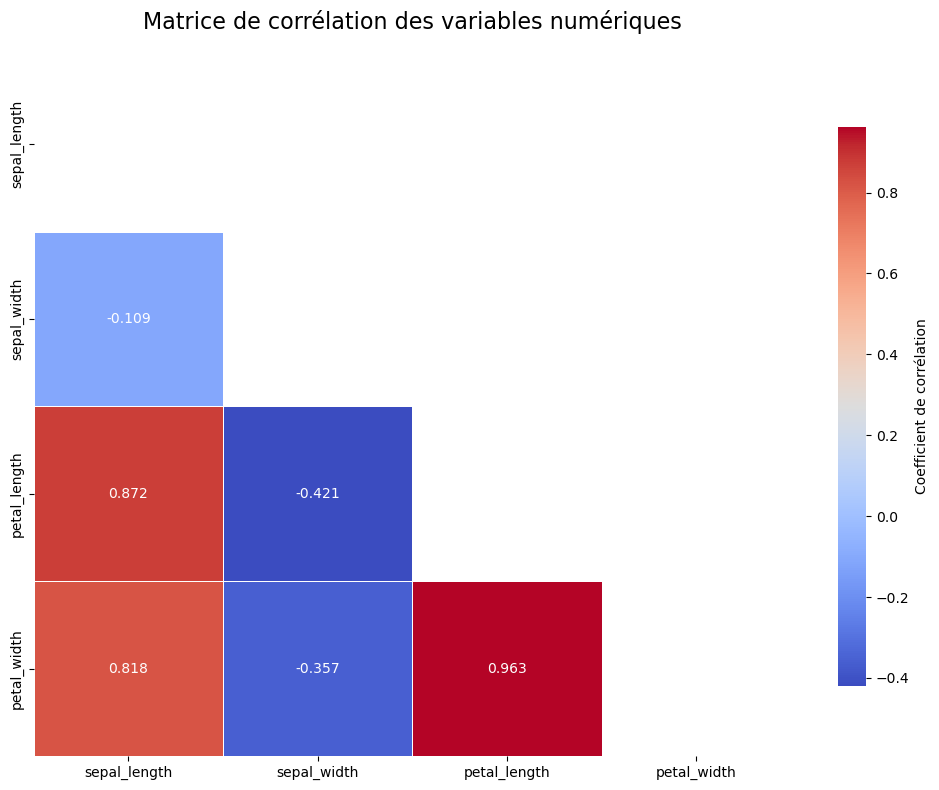


Corrélations fortes (|r| > 0.7):
petal_length et sepal_length: 0.872
petal_width et sepal_length: 0.818
petal_width et petal_length: 0.963


In [365]:
# Calculer la matrice de corrélation
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            annot=True,           
            fmt='.3f',            
            cmap='coolwarm',      
            mask=mask,            
            linewidths=0.5,      
            cbar_kws={'shrink': 0.8, 'label': 'Coefficient de corrélation'})

plt.title('Matrice de corrélation des variables numériques', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_correlations.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if strong_correlations:
    print("\nCorrélations fortes (|r| > 0.7):")
    for var1, var2, corr in strong_correlations:
        print(f"{var1} et {var2}: {corr:.3f}")
else:
    print("\nAucune corrélation forte (|r| > 0.7) n'a été trouvée.")

In [366]:
from sklearn.model_selection import train_test_split, cross_val_score


X = df_numeric  
y = df['species'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [367]:
X_train.shape

(120, 4)

In [368]:
y_train.shape

(120,)

In [369]:
X_test.shape

(30, 4)

In [370]:
y_test.shape

(30,)

In [371]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [372]:
del df['species']

In [373]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [374]:
X = df.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Entrainement et prédiction

In [375]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report

def machine_learning(classifieur):

    classifieur.fit(X_train, y_train)
    
    y_pred = classifieur.predict(X_test)
    
    print('Matrice de confusion \n')
    print(confusion_matrix(y_test, y_pred))
    
    print('\nScore de précision \n')
    sp = round(accuracy_score(y_pred,y_test)*100,2)
    print(f"Précision : {sp}%")

    # F1-score
    print('\nF1-score \n')
    # F1-score pour chaque classe
    f1 = f1_score(y_test, y_pred, average=None)
    for i, score in enumerate(f1):
        print(f"Classe {i}: {round(score*100, 2)}%")

k = 1, Précision (test): 0.9667, Précision (validation croisée): 0.9417
k = 2, Précision (test): 0.9333, Précision (validation croisée): 0.9583
k = 3, Précision (test): 1.0000, Précision (validation croisée): 0.9583
k = 4, Précision (test): 1.0000, Précision (validation croisée): 0.9667
k = 5, Précision (test): 1.0000, Précision (validation croisée): 0.9750
k = 6, Précision (test): 0.9667, Précision (validation croisée): 0.9833
k = 7, Précision (test): 0.9667, Précision (validation croisée): 0.9750
k = 8, Précision (test): 0.9667, Précision (validation croisée): 0.9667
k = 9, Précision (test): 1.0000, Précision (validation croisée): 0.9583
k = 10, Précision (test): 1.0000, Précision (validation croisée): 0.9583
k = 11, Précision (test): 0.9667, Précision (validation croisée): 0.9583


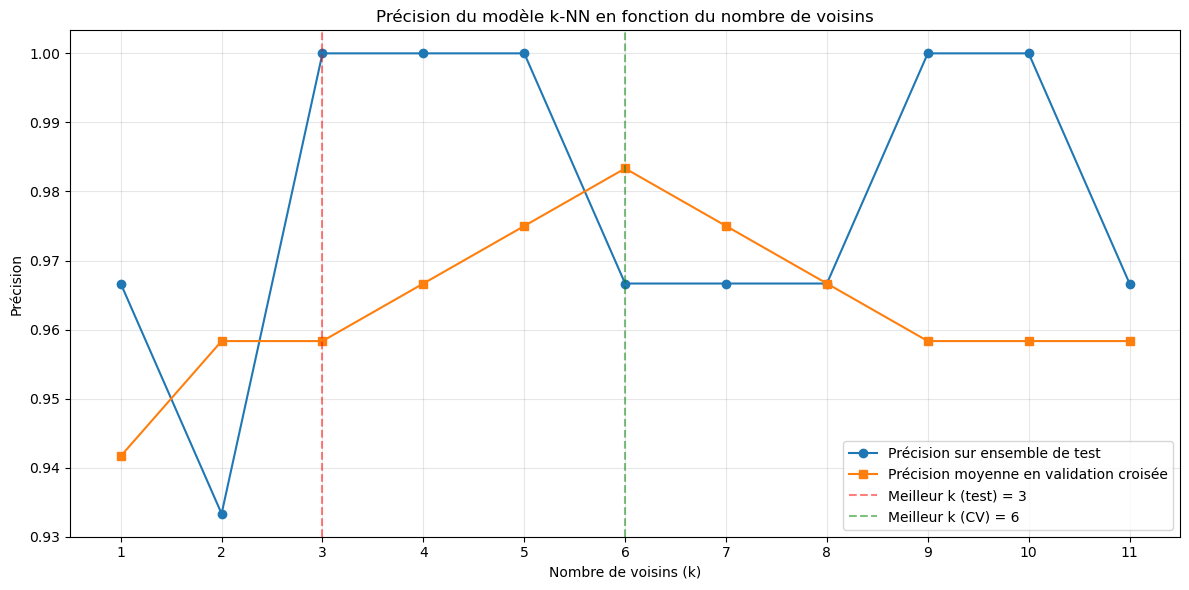

In [376]:
k_values = list(range(1, 12))  
accuracies = []
cv_scores = []

plt.figure(figsize=(12, 6))

for k in k_values:
    
    classifieur = KNeighborsClassifier(n_neighbors=k)
    
    cv_score = cross_val_score(classifieur, X_train, y_train, cv=5).mean()
    cv_scores.append(cv_score)
    
   
    classifieur.fit(X_train, y_train)
    y_pred = classifieur.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"k = {k}, Précision (test): {accuracy:.4f}, Précision (validation croisée): {cv_score:.4f}")

plt.plot(k_values, accuracies, 'o-', label='Précision sur ensemble de test')
plt.plot(k_values, cv_scores, 's-', label='Précision moyenne en validation croisée')

best_k_test = k_values[np.argmax(accuracies)]
best_k_cv = k_values[np.argmax(cv_scores)]

plt.axvline(x=best_k_test, color='r', linestyle='--', alpha=0.5, 
            label=f'Meilleur k (test) = {best_k_test}')
plt.axvline(x=best_k_cv, color='g', linestyle='--', alpha=0.5, 
            label=f'Meilleur k (CV) = {best_k_cv}')

plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Précision')
plt.title('Précision du modèle k-NN en fonction du nombre de voisins')
plt.xticks(k_values)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [377]:
from sklearn.svm import SVC
classifieur = SVC()
machine_learning(classifieur)

Matrice de confusion 

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Score de précision 

Précision : 96.67%

F1-score 

Classe 0: 100.0%
Classe 1: 94.74%
Classe 2: 95.24%


In [378]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
machine_learning(classifieur)

Matrice de confusion 

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Score de précision 

Précision : 96.67%

F1-score 

Classe 0: 100.0%
Classe 1: 94.74%
Classe 2: 95.24%


In [379]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
machine_learning(classifieur)

Matrice de confusion 

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Score de précision 

Précision : 96.67%

F1-score 

Classe 0: 100.0%
Classe 1: 94.74%
Classe 2: 95.24%
